In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from mlxtend.plotting import heatmap
import seaborn as sns

import os

### Load Data

In [2]:
working_dir = os.getcwd()

In [3]:
df = pd.read_csv(working_dir + '/data/raw/Occupancy_Estimation.csv')
df.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


### Prepocessing, Cleansing, Feature Engineering

In [4]:
# Check for NA values
print(df.isna().sum())

Date                    0
Time                    0
S1_Temp                 0
S2_Temp                 0
S3_Temp                 0
S4_Temp                 0
S1_Light                0
S2_Light                0
S3_Light                0
S4_Light                0
S1_Sound                0
S2_Sound                0
S3_Sound                0
S4_Sound                0
S5_CO2                  0
S5_CO2_Slope            0
S6_PIR                  0
S7_PIR                  0
Room_Occupancy_Count    0
dtype: int64


In [5]:
# ID original features and labels
print('Total number of columns:', len(df.columns))
features = df.columns[:18]
print('Original Features:', features)
label = [df.columns[-1]]
print('Original Label:', label)
print('Class labels:', df[label[0]].unique())

Total number of columns: 19
Original Features: Index(['Date', 'Time', 'S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light',
       'S2_Light', 'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound',
       'S4_Sound', 'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR'],
      dtype='object')
Original Label: ['Room_Occupancy_Count']
Class labels: [1 2 3 0]


In [6]:
# Combine date and time into a single timestamp
timestamp = pd.to_datetime(df["Date"].astype(str) + df["Time"], format="%Y/%m/%d%H:%M:%S")
# Insert combined datetime into first column of df
df.insert(0, "Timestamp", timestamp)
# Drop previous date and time columns
df.drop(columns=["Date", "Time"], inplace=True)

# Add occupied bool as potential output
df["Occupied"] = (df["Room_Occupancy_Count"] > 0).astype(int)

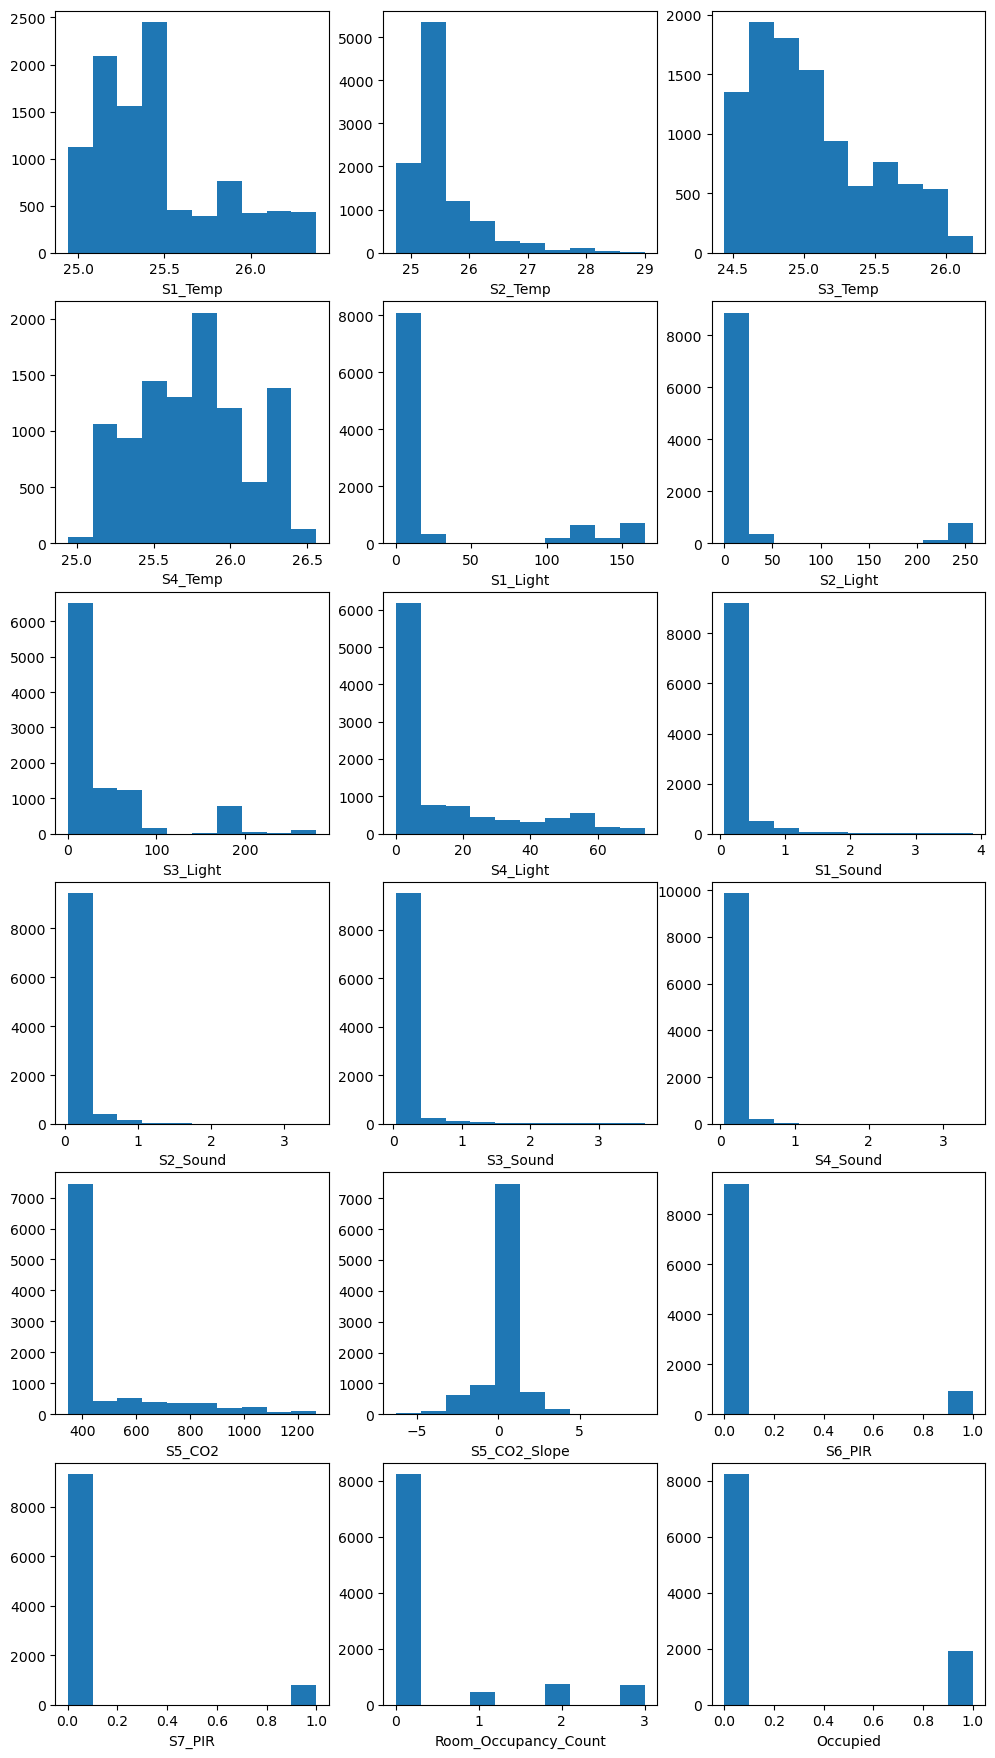

In [7]:
# Create Histograms for features to visualize distributions
columns = df.columns[1:]

fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(12,22))
for idx, ax in enumerate(axes.flatten()):
    if idx >= len(columns):
        break
    # plot histogram
    ax.hist(df[columns[idx]])
    # set xlabel
    ax.set_xlabel(columns[idx])

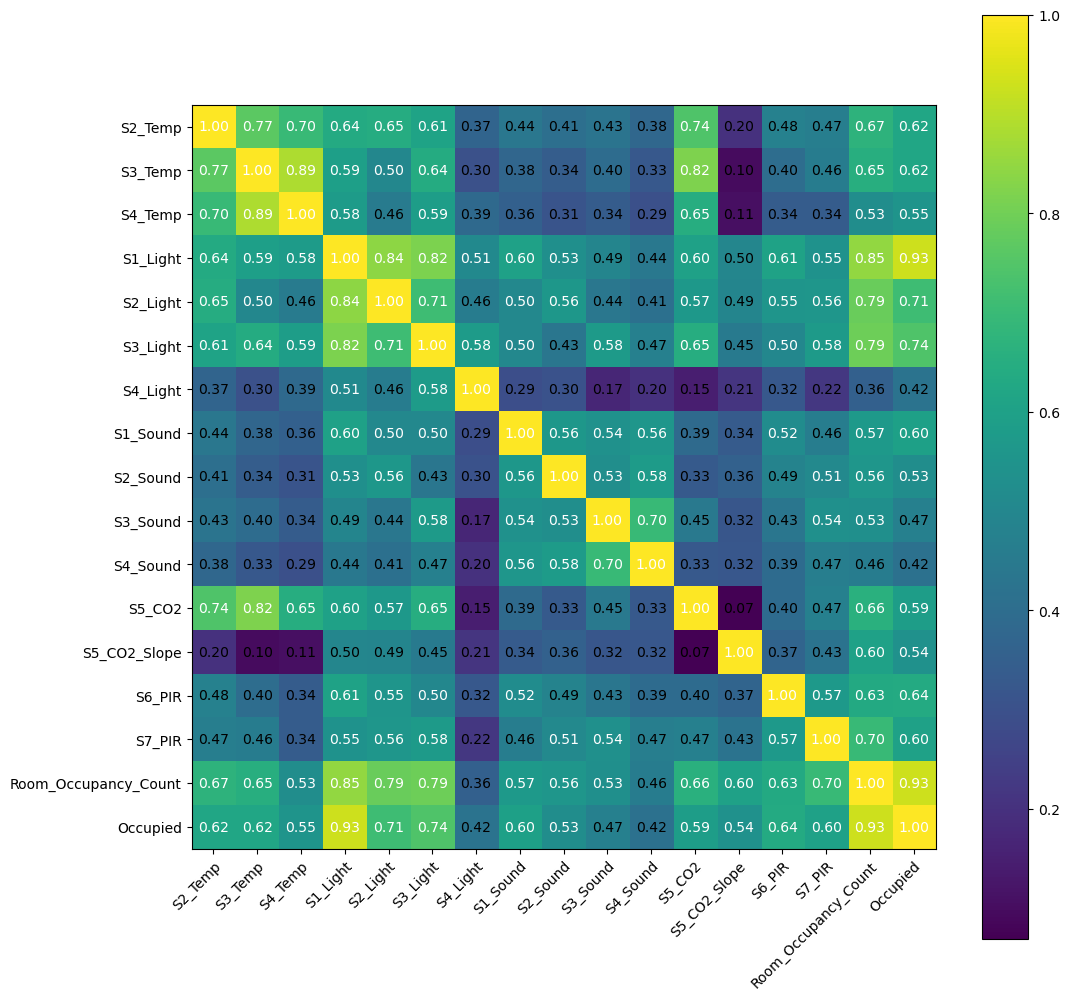

In [8]:
# Create correlation heat map to view correlations between features
columns = df.columns[1:]

cm = df[df.columns[2:]].corr().values 
hm = heatmap(
    cm,
    row_names=df.columns[2:],
    column_names=df.columns[2:],
    figsize=(12,12)
)